In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Uploading the data
data = pd.read_csv("ifood_df.csv")

# Creating a copy to manipulate freely
df = data.copy()

In [3]:
# Checking the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# Double checking if we have any null data
df.isnull().sum().sample(5)

AcceptedCmp4          0
education_2n Cycle    0
Complain              0
MntMeatProducts       0
AcceptedCmp2          0
dtype: int64

In [5]:
# Getting a view of a random sample
df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
905,24401.0,0,0,98,73,28,217,10,24,115,...,1,0,0,0,0,1,0,352,237,0
1722,69901.0,0,1,95,312,21,206,102,92,149,...,0,0,0,0,1,0,0,733,584,0
1793,32583.0,1,1,10,5,0,3,0,0,1,...,1,0,0,0,0,0,1,8,7,0
1455,60474.0,0,1,25,265,199,303,234,9,170,...,0,0,0,0,1,0,0,1010,840,0
1200,8940.0,1,0,25,1,45,3,4,6,42,...,0,0,0,1,0,0,0,59,17,0


In [6]:
# Some Data Cleaning: Creating categorical variables that we'll be needing

#Education Groups
df["Education_level"] = pd.from_dummies(df[["education_2n Cycle","education_Graduation", "education_Master", "education_Basic","education_PhD"]], sep="education_")
df["Education_level"].value_counts()

Education_level
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [7]:
# Some Data Cleaning: Creating categorical variables that we'll be needing in our analysis

#Income Groups
bins = np.linspace(min(df['Income']), max(df['Income']), 4)
groupNames = ["Low", "Med", "High"]
df['Income_group'] = pd.cut(df['Income'], bins, labels = groupNames, include_lowest = True)
df["Income_group"].value_counts()

Income_group
Med     1192
Low      707
High     306
Name: count, dtype: int64

In [8]:
# Some Data Cleaning: Creating categorical variables that we'll be needing in our analysis

#Marital Status
df["Marital_status"] = pd.from_dummies(df[["marital_Married","marital_Divorced", "marital_Single", "marital_Together","marital_Widow"]], sep="marital_")
df["Marital_status"].value_counts()

Marital_status
Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: count, dtype: int64

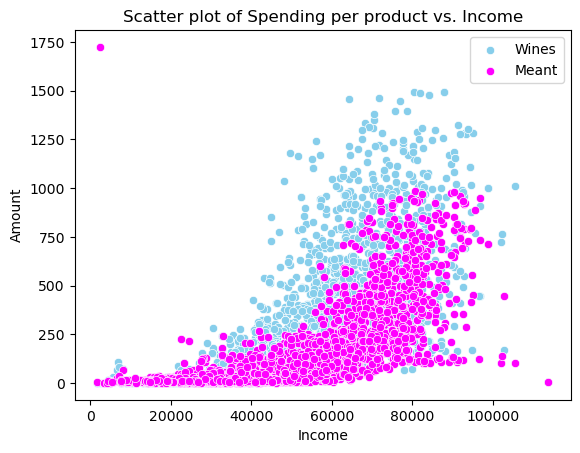

In [9]:
# Question: How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting the average total spending per product vs. Income (Since spendings of Meat and Wine are larger than the rest of the products, we plot them separately)

sns.scatterplot(x="Income", y="MntWines", data=df, label="Wines", color="skyblue")
sns.scatterplot(x="Income", y="MntMeatProducts", data=df, label="Meant", color="magenta")
plt.title("Scatter plot of Spending per product vs. Income")
plt.ylabel("Amount")
plt.xlabel("Income")
plt.show()

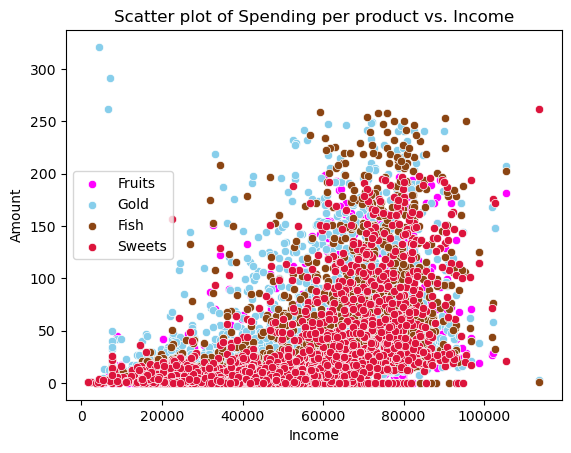

In [10]:
# Question: How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting the average total spending per product vs. Income

sns.scatterplot(x="Income", y="MntFruits", data=df, label="Fruits", color="magenta")
sns.scatterplot(x="Income", y="MntGoldProds", data=df, label="Gold", color="skyblue")
sns.scatterplot(x="Income", y="MntFishProducts", data=df, label="Fish", color="saddlebrown")
sns.scatterplot(x="Income", y="MntSweetProducts", data=df, label="Sweets", color="crimson")
plt.title("Scatter plot of Spending per product vs. Income")
plt.ylabel("Amount")
plt.xlabel("Income")
plt.show()

In [11]:
# How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting a scatter plot with the regression line. I am using plotly here because for me it is the shortest way of getting a scatter plot with a non-linear regression line.
# Another perk of using plotly is that accessing the index of the outliers is much easier:

figure = px.scatter(df,
                 x="Income",
                 y="MntTotal",
                 trendline="ols",
                 trendline_options=dict(log_y=True, log_x=True), 
                 title="Scatter Plot of Income and Total Spending Amount with a Log-transformed Fit",
                 labels={
                    "Income": "Income",
                    "MntTotal": "Total Spending Amount"},
                  hover_data={'index': (df.index)}
                 )
figure.show()


In [12]:
# Checking the outliers:
df.iloc[20:21,:]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,Income_group,Marital_status
20,2447.0,1,0,42,1,1,1725,1,1,1,...,0,1,0,0,1729,1728,0,Graduation,Low,Married


In [13]:
# Checking the outliers:
df.iloc[1872:1873,:]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,Income_group,Marital_status
1872,113734.0,0,0,9,6,2,3,1,262,3,...,0,0,0,1,274,271,0,PhD,High,Single


In [14]:
# Removing the outliers:
df.drop(index=20, inplace=True)
df.drop(index=1872, inplace=True)

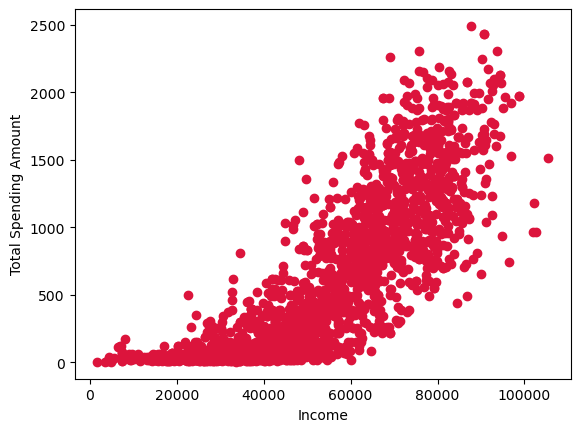

In [15]:
# To get the scatter plot only:
plt.scatter("Income", "MntTotal", data=df, color="crimson")
plt.ylabel("Total Spending Amount")
plt.xlabel("Income")
plt.show()

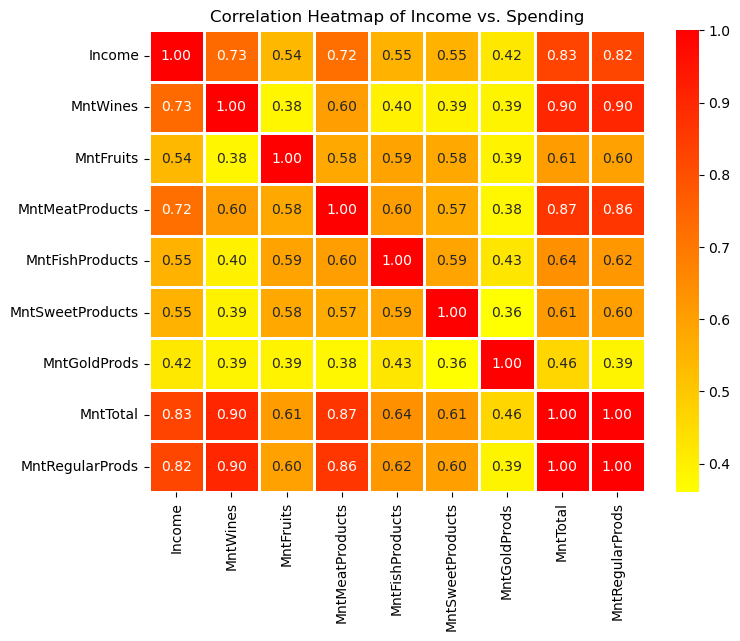

In [16]:
# How does the income influence spending of different products?
# Using a correlation heatmap:

cols = ['Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal', 'MntRegularProds']
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='autumn_r', linewidths=2)
plt.title('Correlation Heatmap of Income vs. Spending')
plt.show()

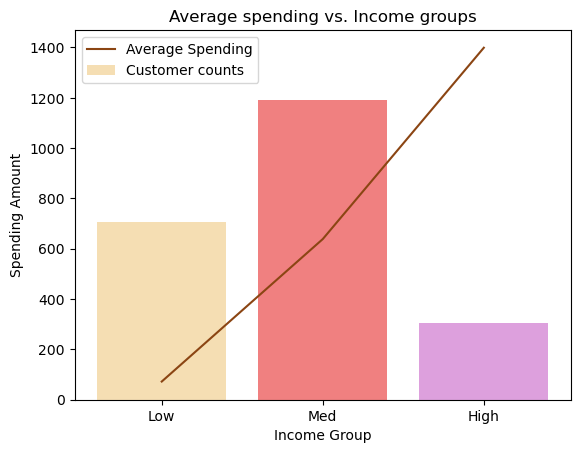

In [17]:
# How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting the average spending per income group in addition to the count of each income group (not very balanced)

income_prod = df.groupby(df["Income_group"], observed=False)["MntTotal"].agg(["mean","count"])

plt.plot(income_prod["mean"], color= "saddlebrown", label="Average Spending")
plt.bar(x=income_prod.index, height=income_prod["count"], color=["wheat", "lightcoral", "plum"], label="Customer counts")
plt.title('Average spending vs. Income groups')
plt.xlabel("Income Group")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()

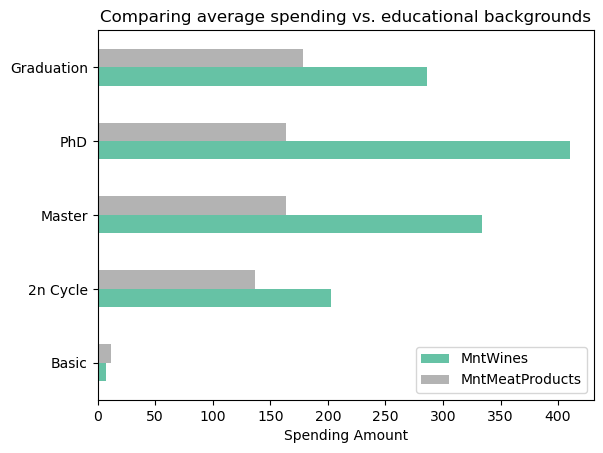

In [18]:
# How does education level influence spending on different categories of food, particularly sweets and healthy options like fruits?
# Plotting the average spending of each product type per education level (Meat and Wine spending to plot separately):

df.groupby(df["Education_level"])[['MntWines', 'MntMeatProducts']].agg("mean").sort_values(by="MntMeatProducts", ascending=True).plot(kind="barh", colormap="Set2")
plt.title("Comparing average spending vs. educational backgrounds")
plt.ylabel("")
plt.xlabel("Spending Amount")
plt.legend()
plt.show()


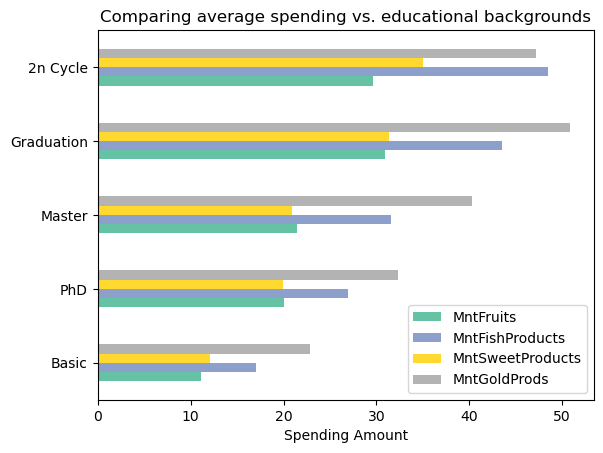

In [19]:
# How does education level influence spending on different categories of food, particularly sweets and healthy options like fruits?
# Plotting the average spending of each product type per education level (Meat and Wine spending to plot separately):

df.groupby(df["Education_level"])[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].agg("mean").sort_values(by="MntSweetProducts", ascending=True).plot(kind="barh", colormap="Set2")
plt.title("Comparing average spending vs. educational backgrounds")
plt.ylabel("")
plt.xlabel("Spending Amount")
plt.legend()
plt.show()


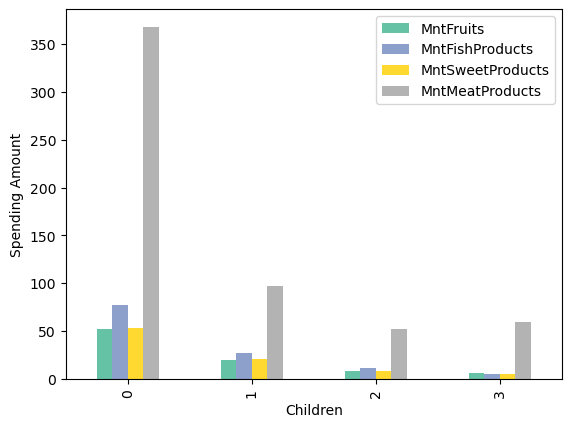

In [20]:
# How does kids number influence the spending per product type?

# Creating a column for total children number: kids + teens
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Grouping the spending by children number: 
df.groupby("Children")[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts']].agg("mean").plot(kind="bar", colormap="Set2")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()

In [21]:
# We notice that the spending on meat products is very high for customers with no children
# Checking the contingency table of Children and education level: 

edu_child = pd.crosstab(df["Children"], df["Education_level"], margins=True)
edu_child[edu_child.loc["All"].sort_values(ascending=False).index].drop(columns="All")


Education_level,Graduation,PhD,Master,2n Cycle,Basic
Children,,,,,
0,318,129,100,63,17
1,572,231,175,98,35
2,199,99,81,34,2
3,23,16,8,3,0
All,1112,475,364,198,54


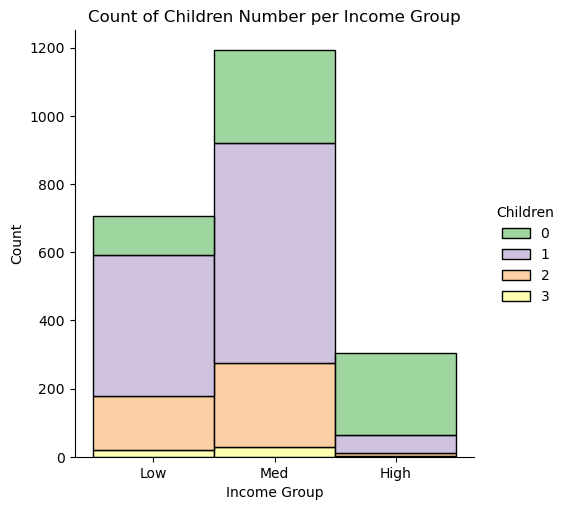

In [22]:
# Visualzing the distribution of children numbers across income groups

sns.displot(data=df, x="Income_group", hue="Children", multiple="stack", palette="Accent")
plt.title("Count of Children Number per Income Group")
plt.ylabel("Count")
plt.xlabel("Income Group")
plt.show()

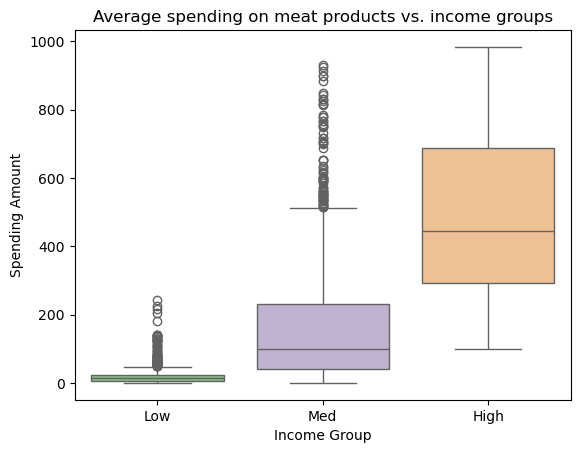

In [23]:
# Visualising the spending on meat products per income groups:

sns.boxplot(y="MntMeatProducts", x="Income_group", hue="Income_group", palette="Accent", data=df)
plt.title('Average spending on meat products vs. income groups')
plt.xlabel("Income Group")
plt.ylabel("Spending Amount")
plt.show()

In [24]:
# Checking the correlation betweem number of Children and Total Amount of Spending:

round(df["Children"].corr(df["MntTotal"]), 2)

-0.5

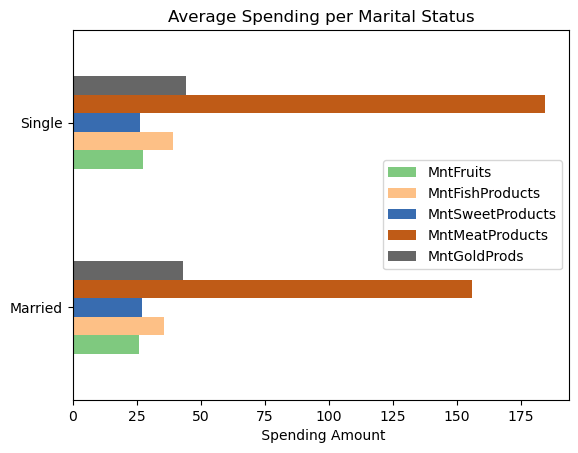

In [25]:

# How does the marital status (married vs. single) influence the spending behaviour?
df_status = pd.concat([ df[df["Marital_status"] == "Married"], df[df["Marital_status"] == "Single"] ])

df_status.groupby("Marital_status")[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts','MntGoldProds']].agg("mean").plot(kind="barh", colormap="Accent")
plt.title("Average Spending per Marital Status")
plt.ylabel("")
plt.xlabel(" Spending Amount")
plt.show()

In [26]:
# Checking customers' martial status and average total spending:
df.groupby("Marital_status")['MntTotal'].agg(["mean", "count"]).sort_values(by="count", ascending=False)


,mean,count
Marital_status,,
Married,545.263775,853
Together,564.350352,568
Single,569.894958,476
Divorced,569.052174,230
Widow,672.105263,76


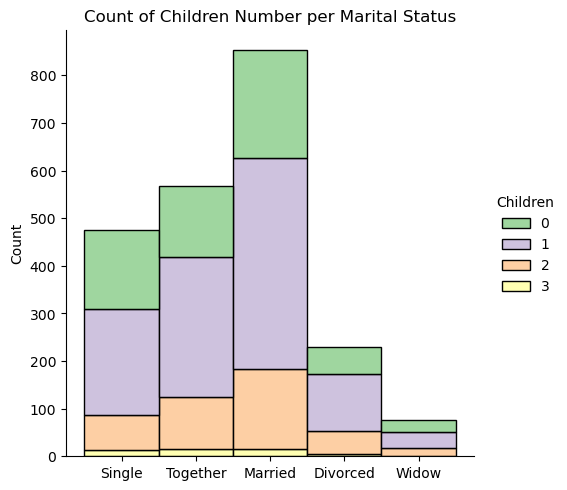

In [27]:
# Checking customers' martial status and average total spending:
# Visualising the distribution of children number according to marital status

sns.displot(data=df, x="Marital_status", hue="Children", multiple="stack", palette="Accent")
plt.title("Count of Children Number per Marital Status")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [28]:
# Checking the distribution of children number according to marital status

child = pd.crosstab(df["Children"], df["Marital_status"]).drop(0)
child.loc["Total"] = child.sum()

child[child.loc["Total"].sort_values(ascending=False).index]

Marital_status,Married,Together,Single,Divorced,Widow
Children,,,,,
1,443,294,222,119,33
2,167,109,73,49,17
3,16,15,14,5,0
Total,626,418,309,173,50


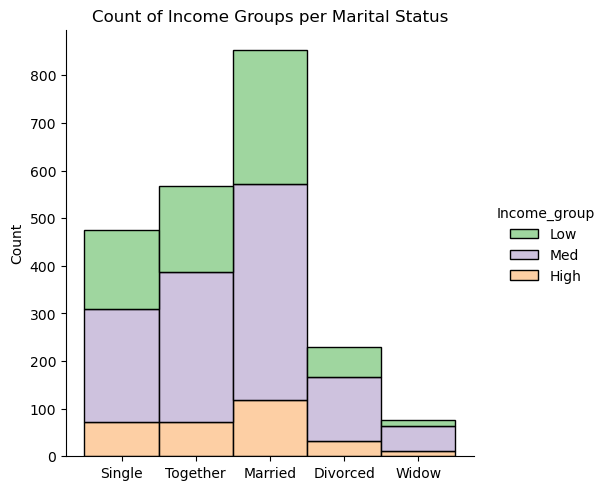

In [29]:
# Checking customers' martial status and average total spending:
# Visualising the distribution of customers' income groups according to marital status

sns.displot(data=df, x="Marital_status", hue="Income_group", multiple="stack", palette="Accent")
plt.title("Count of Income Groups per Marital Status")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [30]:
# Checking the distribution of income groups according to marital status

income = pd.crosstab(df["Income_group"], df["Marital_status"], margins=True)
income[income.loc["All"].sort_values(ascending=False).index].drop(columns="All")


Marital_status,Married,Together,Single,Divorced,Widow
Income_group,,,,,
Low,282,182,167,63,12
Med,453,314,237,135,53
High,118,72,72,32,11
All,853,568,476,230,76
